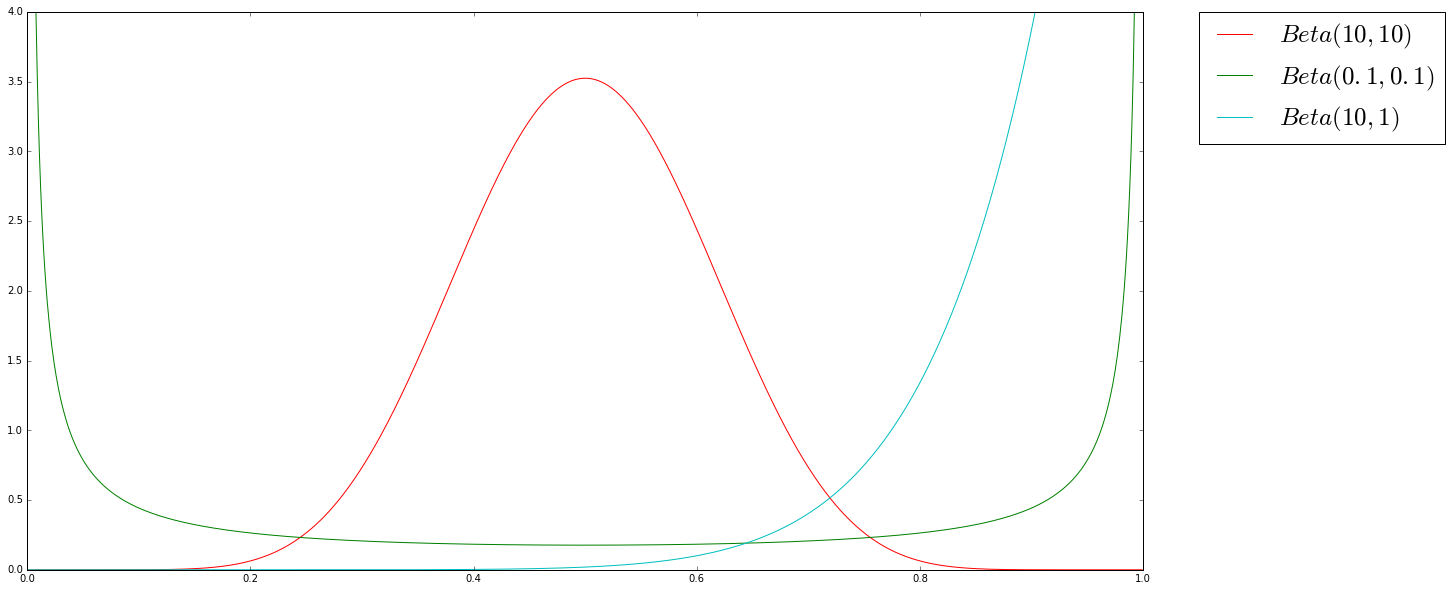

In [3]:
import numpy as nmp
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

axis_x = nmp.arange(0, 1, 0.001)

plt.figure(figsize=(20, 10))

# функции для вывода плотностей Beta-распределений с разными параметрами
plt.plot(axis_x, sts.beta.pdf(axis_x, 10, 10), '-r', label=r'$Beta(10, 10)$')
plt.plot(axis_x, sts.beta.pdf(axis_x, 0.1, 0.1), '-g', label=r'$Beta(0.1, 0.1)$')
plt.plot(axis_x, sts.beta.pdf(axis_x, 10, 1), '-c', label=r'$Beta(10, 1)$')

plt.axis([0, 1, 0, 4])
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, prop={'size':25}, borderaxespad = 0.)
plt.show()

Сопряженное распределение к $Bern(p)$ - $Beta(\alpha_0, \beta_0)$

$Beta(10, 10)$ - априорное распределение "монета, скорее всего, честная"

$Beta(0.1, 0.1)$ - априорное распределение "монета, скорее всего, нечестная"

$Beta(10, 1)$ - априорное распределение "монета, скорее нечестная, с перевесом в сторону герба"

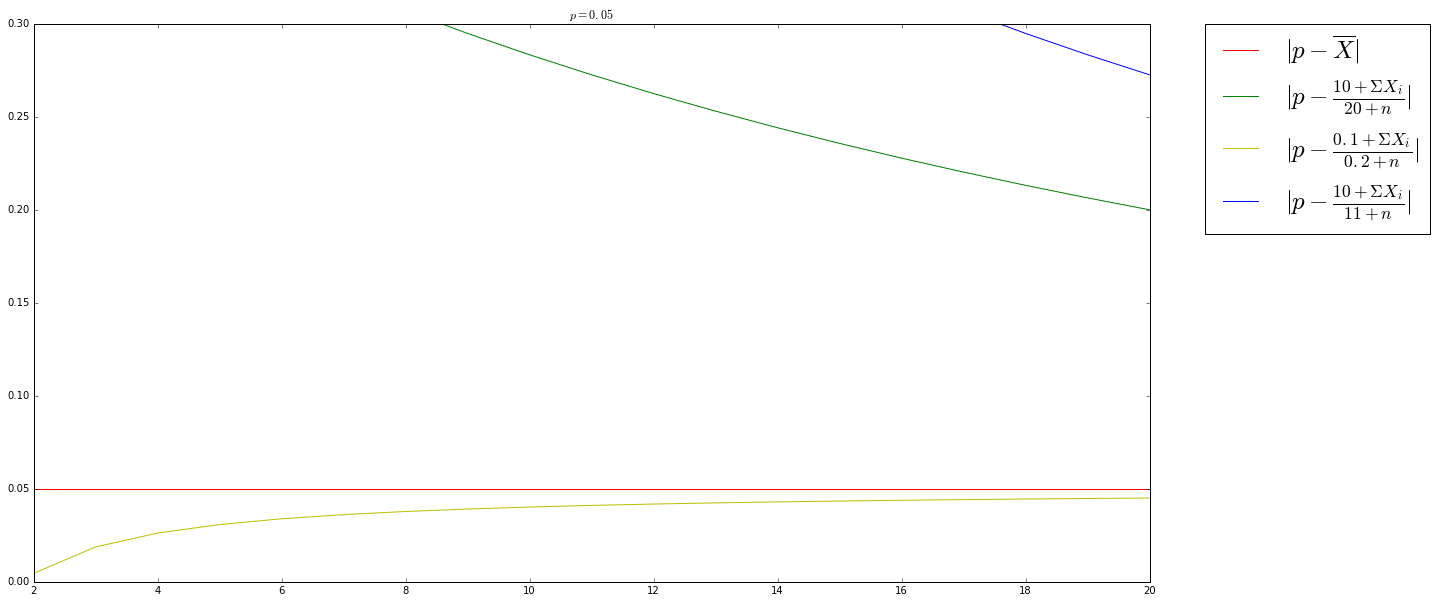

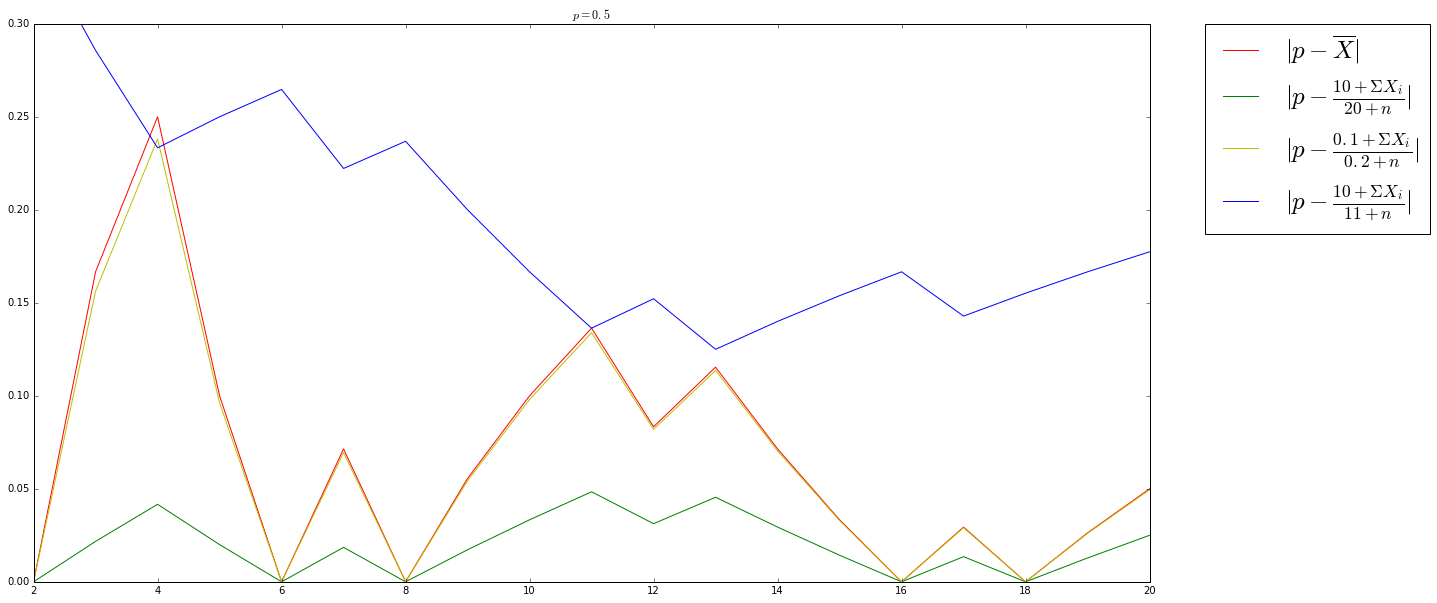

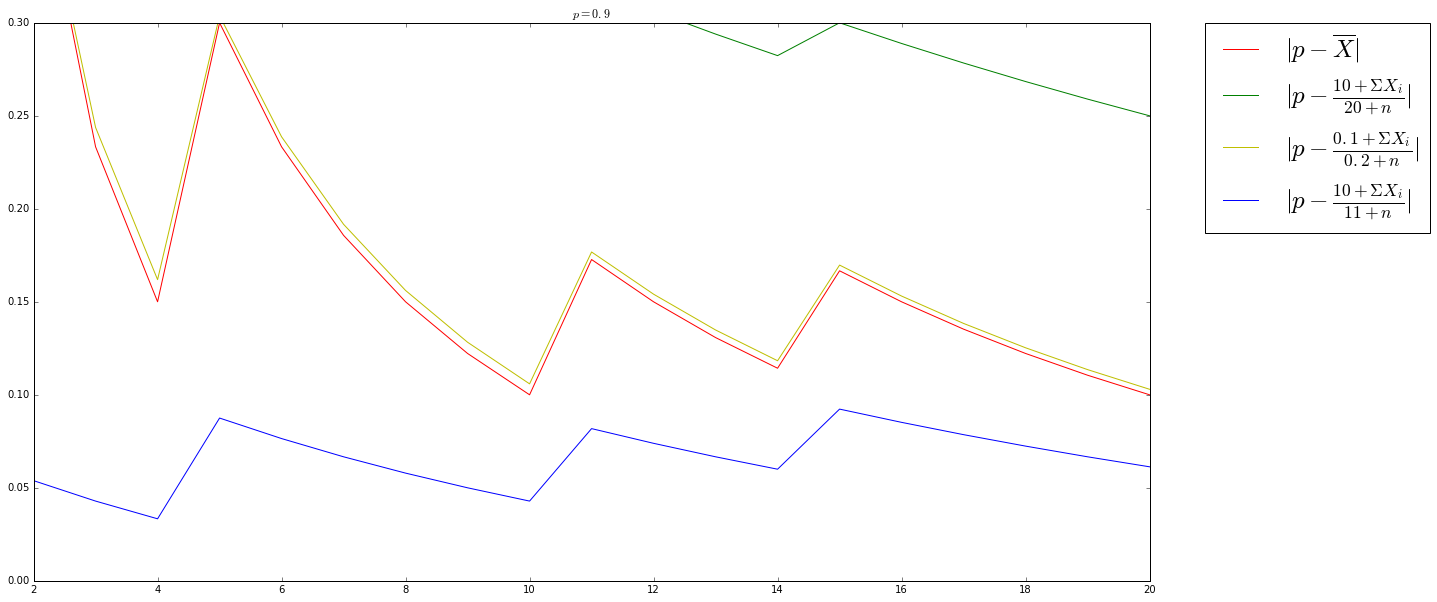

In [5]:
# функция для подсчета байесовской оценки
def b_est(a, b, x, n):
    return (a + nmp.sum(x)) / (a + b + n)

# функци для подписи линий
def _label(a, b):
    return r'\frac{' + str(a) + r'+\Sigma X_i}{' + str(a + b) + r'+n}'

# сами распределения
estimators = [((lambda x, n: nmp.mean(x)), r'\overline{X}', '-r'),
              ((lambda x, n: b_est(10, 10, x, n)), _label(10, 10), '-g'),
              ((lambda x, n: b_est(0.1, 0.1, x, n)), _label(0.1, 0.1), '-y'),
              ((lambda x, n: b_est(10, 1, x, n)), _label(10, 1), '-b')]

# совершаем 20 бросков
N = 20

def function(p):
    x_dist = nmp.random.binomial(1, p, N)
    
    # создаем двумерный массив
    y = [0] * len(estimators)
    for i in range(len(estimators)):
        y[i] = nmp.zeros(N)
    
    # считаем абсолютное отклонение оценок от истинных значений параметра
    for n in range(1, N + 1):
        for i in range(len(estimators)):
            y[i][n - 1] = abs(estimators[i][0](x_dist[:n], n) - p)

    fig = plt.figure(figsize=(20, 10))
    plt.title('$p = ' + str(p) + '$')

    # выводим все 4 линии на график
    axis_x = nmp.arange(1, N + 1, 1)
    for i in range(len(estimators)):
        plt.plot(axis_x, y[i], estimators[i][2], label=r'$|p - '+estimators[i][1]+r'|$')

    plt.axis([2, 20, 0, 0.3])
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, prop={'size':25}, borderaxespad = 0.)
    plt.show()

# выполняем для кажого значения параметра
function(0.05)
function(0.5)
function(0.9)

Вывод:

$\overline X$ - оценка максимального правдоподобия.

Для $p = 0.05$ лучшими оказались оценка максимального правдоподобия и байесовская с априорным распределением "нечестной" монеты.

Для $p = 0.5$ лучшей оказалась байесовская оценка с априорным распределением "честной" монеты.

Для $p = 0.9$ лучшей оказалась байесовская оценка с априорным распределением "нечестной в сторону герба" монеты.